### Part 1: Prepare the Data

In [27]:
import pandas as pd
from path import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#Read `myopia.csv` into a Pandas DataFrame.
myopia_df= pd.read_csv('myopia.csv')
myopia_df.head()



,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [28]:
#Remove the "MYOPIC" column from the dataset.
myopia_df = myopia_df.drop('MYOPIC', axis=1)
myopia_df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [29]:
#Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(myopia_df)
df_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [30]:
df_scaled.shape

(618, 14)

### Part 2: Apply Dimensionality Reduction

In [31]:
#Perform dimensionality reduction with PCA. 
pca = PCA(n_components=.9)
principal_components = pca.fit_transform(df_scaled)
principal_components.shape


(618, 10)

How did the number of the features change?
When using PCA we used a variance of 90%. This means that all the variables we are now using explain 90% of the variablilty. We are just making our model more pricise. Here we can see that our model droped 4 compontents and now has 10 instead of the 14 it had before. 

In [32]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation. 
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape


(618, 2)

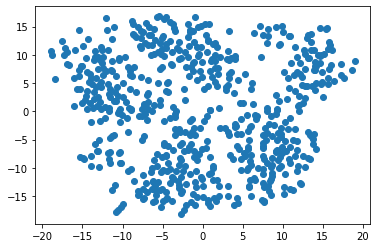

In [33]:
#Create a scatter plot of the t-SNE output. Are there distinct clusters?
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

Are there distinct clusters?
There is a slight divied but no real seperation in form of clusters. 

### Part 3: Perform a Cluster Analysis with K-means

In [34]:
#Create an elbow plot to identify the best number of clusters. Make sure to do the following:
#Use a `for` loop to determine the inertia for each `k` between 1 through 10. 

K = list(range(1,11))
wss = []
for k in K:
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans=kmeans.fit(principal_components)
    wss_data=kmeans.inertia_
    wss.append(wss_data)
    


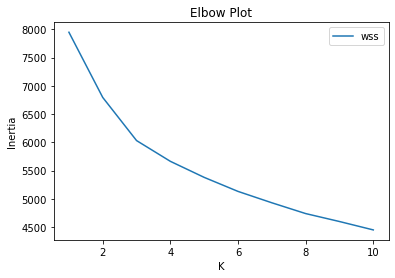

In [36]:
#If possible, determine where the elbow of the plot is, and at which value of `k` it appears.
elbow_df = pd.DataFrame({'K': K, 'wss': wss})
elbow_df.plot.line(x='K', y='wss')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

### Part 4: Make a Recommendation
Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters? 

Looking at the Elbow Plot it doesnt seem to have a strong elbow point. It is pretty hard to tell what the ideal number of clusters is just by looking at this plot. Futhermore t-distributed Stochastic Neighbor Embedding is not very conclusive either. 